In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'


In [2]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [3]:
p_l = 1.0/21.0
p_f = 1- p_l
prior = torch.distributions.Categorical(probs=torch.tensor([p_l, p_f]))
prior

Categorical(probs: torch.Size([2]))

Text(0.5, 1.0, 'Prior')

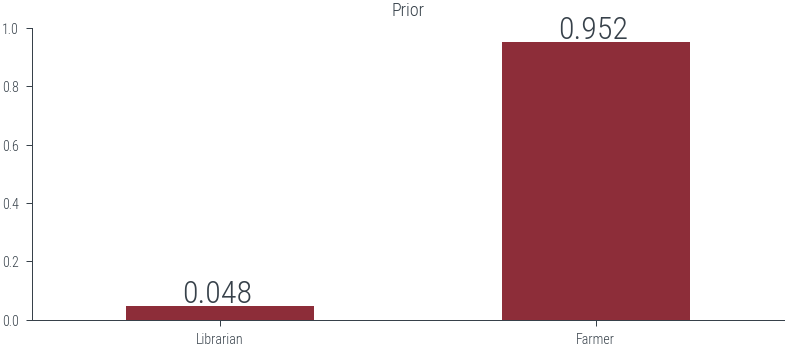

In [4]:
pd.Series(index=["Librarian", "Farmer"], data=prior.probs).plot(kind='bar', rot=0)
# Write the values on top of the bar
for i, v in enumerate(prior.probs):
    plt.text(i - 0.1, v + 0.01, f"{v.item():0.3f}")
plt.title("Prior")

In [5]:
# Get 210 samples from prior given a seed

torch.manual_seed(3)
samples = prior.sample(torch.Size([210, ]))
print(samples)
print(samples.sum())

tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor(199)


In [43]:
p_d_l = torch.tensor(0.4)
p_d_f = torch.tensor(0.1)

In [44]:
p_l_d = (p_d_l * p_l) / (p_d_l * p_l + p_d_f * p_f)
p_l_d

tensor(0.1667)

In [46]:
p_d_l *p_l

tensor(0.0190)

In [48]:
p_d_f*p_f

tensor(0.0952)

In [49]:
## Electricity consumption

In [52]:
prior_theta_0 = torch.distributions.Uniform(80, 100)
prior_theta_1 = torch.distributions.Uniform(1, 2)

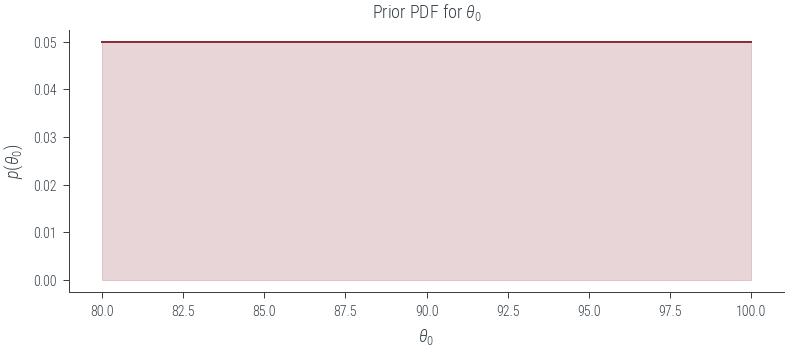

In [62]:
# Plottting PDFs

eps = 1e-3
theta_0_lin = torch.linspace(80+eps, 100.0-eps, 100)
plt.plot(theta_0_lin, torch.exp(prior_theta_0.log_prob(theta_0_lin)))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$p(\theta_0)$')
plt.title(r'Prior PDF for $\theta_0$')
# Fill between 
plt.fill_between(theta_0_lin, torch.exp(prior_theta_0.log_prob(theta_0_lin)), color='C0', alpha=0.2)

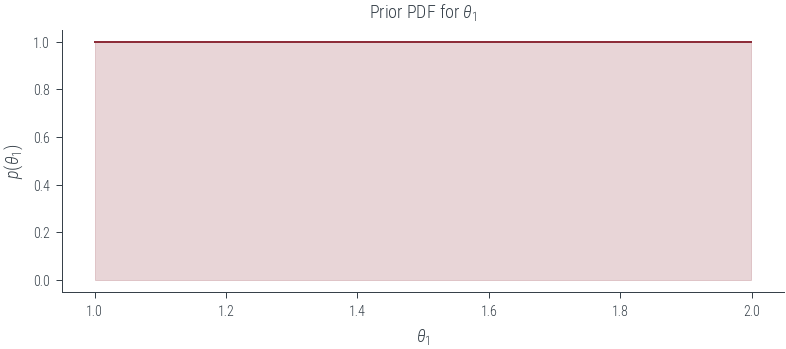

In [63]:
theta_1_lin = torch.linspace(1+eps, 2.0-eps, 100)
plt.plot(theta_1_lin, torch.exp(prior_theta_1.log_prob(theta_1_lin)))
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$p(\theta_1)$')
plt.title(r'Prior PDF for $\theta_1$')
# Fill between 
plt.fill_between(theta_1_lin, torch.exp(prior_theta_1.log_prob(theta_1_lin)), color='C0', alpha=0.2)

In [68]:
# plotting samples from prior

n_samples = 10
theta_0s = prior_theta_0.sample(torch.Size([n_samples,]))
theta_1s = prior_theta_1.sample(torch.Size([n_samples,]))

Text(0.5, 1.0, '$\\theta_0$')

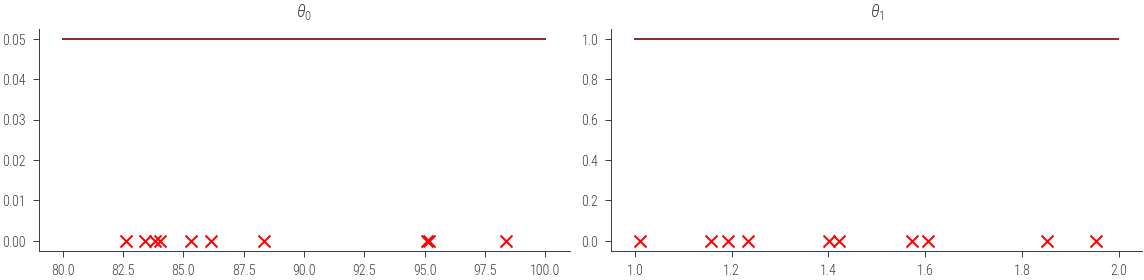

In [81]:
# Plot the samples
fig, ax = plt.subplots(figsize=(8, 2), ncols=2)
ax[0].plot(theta_0_lin, torch.exp(prior_theta_0.log_prob(theta_0_lin)), label='prior')

# plot theta_0 samples
ax[0].scatter(theta_0s, torch.zeros_like(theta_0s),  label='samples',c='r', marker='x')

ax[1].plot(theta_1_lin, torch.exp(prior_theta_1.log_prob(theta_1_lin)), label='prior')
ax[1].scatter(theta_1s, torch.zeros_like(theta_1s), label='samples',c='r', marker='x')

ax[1].set_title(r'$\theta_1$')
ax[0].set_title(r'$\theta_0$')

tensor(83.4136) tensor(1.1563)
tensor(98.3575) tensor(1.8526)
tensor(84.0483) tensor(1.6053)
tensor(88.3438) tensor(1.4018)
tensor(95.0774) tensor(1.9525)
tensor(85.3081) tensor(1.2342)
tensor(83.8171) tensor(1.5724)
tensor(86.1438) tensor(1.4227)
tensor(95.1942) tensor(1.0098)
tensor(82.6015) tensor(1.1919)


Text(0, 0.5, 'Electricity Consumption')

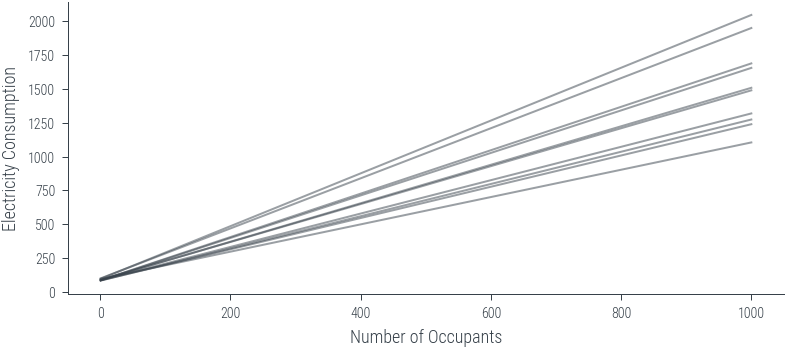

In [97]:
# Generating draws from prior

xs = torch.linspace(1, 1000, 100)
def forward(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

preds = []

for theta_0, theta_1 in zip(theta_0s, theta_1s):
    print(theta_0.item(), theta_1.item())
    preds.append(forward(xs, theta_0, theta_1))
    plt.plot(xs, preds[-1], color='C1', alpha=0.5)

plt.xlabel('Number of Occupants')
plt.ylabel('Electricity Consumption')

In [84]:
forward(xs, theta_0, theta_1)

tensor([83.7934])

In [102]:
preds[-1]

tensor([  83.7934,   95.8203,  107.8471,  119.8740,  131.9008,  143.9277,
         155.9545,  167.9814,  180.0083,  192.0351,  204.0620,  216.0888,
         228.1157,  240.1426,  252.1694,  264.1963,  276.2231,  288.2500,
         300.2769,  312.3037,  324.3306,  336.3574,  348.3843,  360.4111,
         372.4380,  384.4648,  396.4917,  408.5186,  420.5454,  432.5723,
         444.5992,  456.6260,  468.6529,  480.6797,  492.7066,  504.7335,
         516.7603,  528.7872,  540.8140,  552.8409,  564.8677,  576.8946,
         588.9214,  600.9484,  612.9752,  625.0021,  637.0289,  649.0558,
         661.0826,  673.1095,  685.1364,  697.1632,  709.1901,  721.2169,
         733.2438,  745.2707,  757.2975,  769.3244,  781.3512,  793.3781,
         805.4050,  817.4318,  829.4587,  841.4855,  853.5124,  865.5393,
         877.5661,  889.5930,  901.6198,  913.6467,  925.6736,  937.7004,
         949.7273,  961.7541,  973.7810,  985.8079,  997.8347, 1009.8616,
        1021.8884, 1033.9153, 1045.942

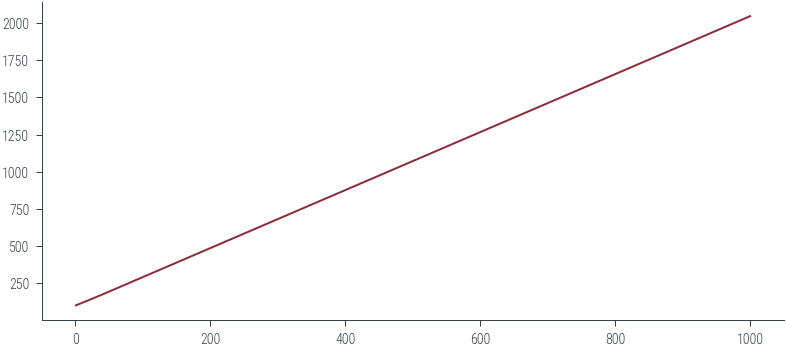

In [111]:
plt.plot(xs, torch.stack(preds).max(axis=0).values)

In [110]:
torch.stack(preds).max(axis=0).values

tensor([ 100.2101,  118.9044,  137.5986,  156.2929,  175.8384,  195.5405,
         215.2426,  234.9448,  254.6469,  274.3490,  294.0511,  313.7533,
         333.4554,  353.1575,  372.8596,  392.5617,  412.2639,  431.9660,
         451.6681,  471.3702,  491.0724,  510.7745,  530.4766,  550.1788,
         569.8809,  589.5830,  609.2852,  628.9872,  648.6894,  668.3915,
         688.0936,  707.7958,  727.4979,  747.2000,  766.9022,  786.6043,
         806.3064,  826.0085,  845.7106,  865.4127,  885.1149,  904.8170,
         924.5192,  944.2213,  963.9234,  983.6255, 1003.3276, 1023.0298,
        1042.7319, 1062.4340, 1082.1361, 1101.8383, 1121.5404, 1141.2424,
        1160.9446, 1180.6467, 1200.3489, 1220.0510, 1239.7531, 1259.4552,
        1279.1573, 1298.8595, 1318.5615, 1338.2638, 1357.9658, 1377.6680,
        1397.3701, 1417.0723, 1436.7743, 1456.4764, 1476.1786, 1495.8806,
        1515.5829, 1535.2849, 1554.9871, 1574.6892, 1594.3914, 1614.0935,
        1633.7955, 1653.4977, 1673.199